# SPECTRE TEST
- Using H5 Model trained using ISCX-IDS-2012 Dataset
- Testing using Malware Capture Facility Project Dataset - CTU-Malware-Capture-Botnet-135-1 Stlrat DDoS (MD5: `c7838b75ba10b0341554d25fbcc3bbc0`)

## Import Dependencies

In [1]:
import sys
from scapy.all import *
import h5py
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

2023-04-06 02:39:25.282418: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-06 02:39:25.315365: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-06 02:39:25.316437: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 02:39:26.179214: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
print(f"Scapy Version: {scapy.__version__}")
print(f"Python {sys.version}")
print(f"Scapy Version: {np.__version__}")

Scapy Version: 2.5.0
Python 3.9.16 (main, Mar  8 2023, 14:00:05) 
[GCC 11.2.0]
Scapy Version: 1.23.5


## Data Preperation

### Load the pcap file

In [3]:
# ISCX-IDS-2012 - 14 JUN
#mal_pcap = scapy.rdpcap('/mnt/Data/SPECTRE/Dataset/ISCX-2012/PCAP/testbed-14jun.pcap') 

# Malware Capture Facility Project - CTU-Malware-Capture-Botnet-135-1 Stlrat DDoS
mal_pcap = rdpcap('/mnt/Data/SPECTRE/Dataset/Malware Capture Facility Project/2015-09-10_winlinux.pcap') 

In [4]:
mal_pcap
#mal_pcap.show()

<2015-09-10_winlinux.pcap: TCP:539671 UDP:12 ICMP:0 Other:6>

### Extract the features from each packet, preprocess the data, and store it in a list:

In [6]:
from scapy.layers.inet import IP, UDP, TCP, ICMP

data = []
for packet in mal_pcap:
    # Extract the required information from each packet
    
    # Check if the packet has a IP layer
    if TCP in packet:
        src_ip = packet[IP].src
        dst_ip = packet[IP].dst
        protocol = packet[IP].proto
    else:
        src_ip = None
        dst_ip = None
        protocol = None
    
    # Check if the packet has a TCP layer
    if TCP in packet:
        src_port = packet[TCP].sport
        dst_port = packet[TCP].dport
    else:
        src_port = None
        dst_port = None
    
    # Preprocess the data and store it in a list
    processed_data = [src_ip, dst_ip, src_port, dst_port, protocol]
    data.append(processed_data)

### Prepare the data for the model

In [21]:
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Activation  
from keras.models import Model, load_model
#from tensorflow.keras.models import load_model
#from keras import models  

In [22]:
data = np.array(data)
data = data.reshape(data.shape[0], data.shape[1], 1)

## Model Preperation

### Load H5 Model

In [41]:
spectre_model = load_model('/home/aryn/spectre-dev/spectre-code/spectre-ann/Model/DDOS/spectre_ddos_h5.h5')

In [ ]:
#try:
    # Load the H5 model
#    with h5py.File('/home/aryn/spectre-dev/spectre-code/spectre-ann/Model/DDOS/FYP_Finalh5.h5', 'r') as spectre_model:
        # Print metadata
#        print("H5 file metadata:")
#        print("==================")
#        for key, value in spectre_model.attrs.items():
#            print(f"{key}: {value}")
#        print("==================")
#        print("Done!")
#except:
#    print("Error loading H5 file.")

In [40]:
spectre_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

### Model Visualization

In [28]:
#from keras.utils.vis_utils import plot_model
#plot_model(spectre_model, to_file='spectre_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#!pip install visualkeras

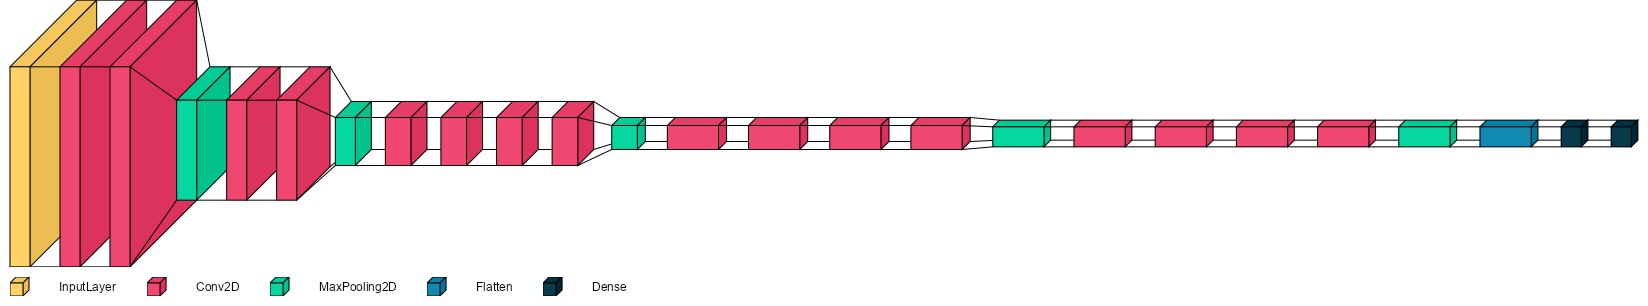

In [38]:
import visualkeras
from PIL import ImageFont
visual_font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(spectre_model, legend=True, spacing=30, font=visual_font) # type: ignore

## Model Prediction

### Use the model to predict anomalies

In [ ]:
#model = spectre_model

In [39]:
predictions = spectre_model.predict(data)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type NoneType).

### Calculate the detection rate and amount of anomalies detected

In [ ]:
detection_rate = np.sum(predictions)/len(predictions)
anomalies_detected = np.sum(predictions)

## Results

In [ ]:
x = ['Detection rate', 'Anomalies detected']
y = [detection_rate, anomalies_detected]

plt.bar(x, y)
plt.show()